In [396]:
# imported necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [397]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [398]:
# imported our functions
import sys
sys.path.append("Functions/")
import functions as func

In [399]:
# we import in our dataset
df = pd.read_excel("internshala_scraped_raw.xls")
df.head(3)

,Title,Company,Location,Duration,Stipend,Apply By,Applicants,Skills Required,Perks,Number of Openings,Link
0,Fundraising,Tare Zameen Foundation,Work From Home,1 Month,1000 /month + Incentives,18 Feb' 22,390 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",200.0,https://internshala.com/internship/detail/fund...
1,Business Development,Internshala,Gurgaon,6 Months,20000 /month,22 Feb' 22,346 applicants,"MS-Office ,","Certificate , Informal dress code , 5 days a w...",2.0,https://internshala.com/internship/detail/busi...
2,Campus Ambassador,International Model United Nations,Work From Home,1 Month,Performance Based,2 Mar' 22,654 applicants,NaN,"Certificate , Letter of recommendation , Flexi...",3000.0,https://internshala.com/internship/detail/camp...


In [400]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(df)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Number of Openings,float64,True,15109,11,38,2.0,6.529089,1.0,1.0,2.0,4.0,5000.0,81.266796,43.679245,2268.32485
Duration,object,False,15120,0,16,3 Months,-,-,-,-,-,-,-,-,-
Apply By,object,False,15120,0,38,23 Feb' 22,-,-,-,-,-,-,-,-,-
Perks,object,False,14207,913,120,"Certificate , Letter of recommendation , Flexi...",-,-,-,-,-,-,-,-,-
Location,object,False,15120,0,204,Work From Home,-,-,-,-,-,-,-,-,-
Stipend,object,False,15120,0,444,5000 /month,-,-,-,-,-,-,-,-,-
Applicants,object,False,15120,0,458,Be an early applicant,-,-,-,-,-,-,-,-,-
Title,object,False,15120,0,2342,Business Development (Sales),-,-,-,-,-,-,-,-,-
Skills Required,object,False,11638,3482,5054,"English Proficiency (Spoken) , English Profici...",-,-,-,-,-,-,-,-,-
Company,object,False,15120,0,8480,Relinns Technologies,-,-,-,-,-,-,-,-,-


##### Data Cleaning

In [401]:
# filtered out unpaid or performance based internships
df = df[~((df.Stipend == "Unpaid") | (df.Stipend == "Performance Based"))]

In [402]:
# added an incentives column (1 if incentives)
df["Incentives"] = df["Stipend"].apply(lambda x: 1 if "Incentives" in x else 0)

In [403]:
# removed incentives from stipend
df["Stipend"] = df["Stipend"].str.replace("  Incentives", "")

In [404]:
# dropped 6 rows with corrupted data
df[df.Stipend == "Not provided"].index
df.drop(df[df.Stipend == "Not provided"].index, axis=0, inplace=True)

In [405]:
# added separate column for lumpsum amount to do calculations of per month
df["Lumpsum"] = df["Stipend"].apply(lambda x: x.split("lump sum")[0] if "lump sum" in x else 0)
# removed word lump sum from stipend
df["Stipend"] = df["Stipend"].str.replace("lump sum", "")
# added separate column for weekly amount to do calculation of per month
df["Weekly"] = df["Stipend"].apply(lambda x: x.split("/week")[0] if "/week" in x else 0)
# removed word week from stipend
df["Stipend"] = df["Stipend"].str.replace("/week","")

In [406]:
# dropped 2 rows with inconsistent data
df[df.Stipend.str.contains("Design")]
df.drop(df[df.Stipend.str.contains("Design")].index, axis=0, inplace=True)

In [407]:
# removed the word month from stipend
df["Stipend"] = df["Stipend"].str.replace("/month", "")
# removed the symbol "+" from stipend
df["Stipend"] = df["Stipend"].str.replace("+", "")
# striped blank spaces from stipend to do calculations w/o exceptions
df["Stipend"] = df["Stipend"].str.strip()
# averaged the stipend for ranged values
df["Stipend"] = df["Stipend"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in x else x)

In [408]:
# dropped 1 row with corrupted data
df.drop(df[df.Duration.str.contains("Not Provided")].index, axis=0, inplace=True)

In [409]:
# made duration monthly column to store conversions in month for further calculations
df["Duration in Month"] = df["Duration"].apply(lambda x: x.split(" ")[0] if "Month" in x else float(x.split(" ")[0].strip()) / 4.345)
# averaged ranged lumpsum values
df["Lumpsum"] = df["Lumpsum"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in str(x) else x)
# converted to float for ease in calculations
df["Duration in Month"] = df["Duration in Month"].astype("float")
df["Lumpsum"] = df["Lumpsum"].astype("float")
# divided lumpsum by monthly duration to get monthly amount
df["Lumpsum to monthly"] = (df["Lumpsum"]) / (df["Duration in Month"])
# averaged ranged weekly values
df["Weekly"] = df["Weekly"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if "-" in str(x) else x)
# converted to float for ease in further calculations
df["Weekly"] = df["Weekly"].astype("float")
# converted weekly amount to monthly
df["Weekly to monthly"] = df["Weekly"] * 4.345

In [410]:
# converted stipend to float for ease in calculations
df["Stipend"] = df["Stipend"].astype("float")

# calculated and converted to monthly stipend amount and storing back to stipend column
df["Stipend monthly"] = df.apply(lambda x: x["Stipend"] if x["Lumpsum to monthly"] == 0 else x["Lumpsum to monthly"], axis=1)
df["Stipend monthly2"] = df.apply(lambda x: x["Stipend monthly"] if x["Weekly to monthly"] == 0 else x["Weekly to monthly"], axis=1)
df["Stipend"] = df["Stipend monthly2"]

In [411]:
# storing back converted to monthly duration back to duration column
df.Duration = df["Duration in Month"]

In [412]:
# dropped all irrelevant columns made above
df.drop(['Duration in Month', 'Lumpsum to monthly', 'Weekly to monthly', 'Stipend monthly', 
        'Stipend monthly2', 'Lumpsum', 'Weekly', 'Link', 'Apply By'], axis=1, inplace=True)

In [413]:
# we call our univariate stats function to get an overview of our dataset
func.univarstats(df)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Number of Openings,float64,True,14454,4,27,2.0,3.672063,1.0,1.0,2.0,4.0,300.0,5.309905,20.466837,933.699816
Duration,float64,True,14458,0,15,3.0,3.723026,0.23015,3.0,3.0,6.0,36.0,1.934034,3.379229,49.82327
Incentives,int64,True,14458,0,2,0,0.088809,0,0.0,0.0,0.0,1,0.284478,2.89125,6.360204
Stipend,float64,True,14458,0,203,5000.0,7405.712764,5.0,4000.0,6000.0,10000.0,100000.0,5165.484471,2.087127,13.568873
Perks,object,False,13558,900,120,"Certificate , Letter of recommendation , Flexi...",-,-,-,-,-,-,-,-,-
Location,object,False,14458,0,204,Work From Home,-,-,-,-,-,-,-,-,-
Applicants,object,False,14458,0,451,Be an early applicant,-,-,-,-,-,-,-,-,-
Title,object,False,14458,0,2237,Business Development (Sales),-,-,-,-,-,-,-,-,-
Skills Required,object,False,11248,3210,4949,"English Proficiency (Spoken) , English Profici...",-,-,-,-,-,-,-,-,-
Company,object,False,14458,0,8239,Relinns Technologies,-,-,-,-,-,-,-,-,-


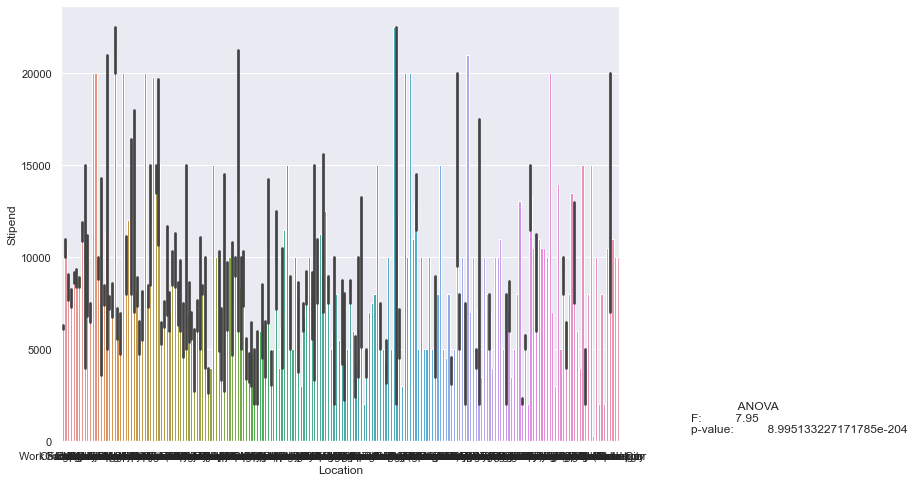

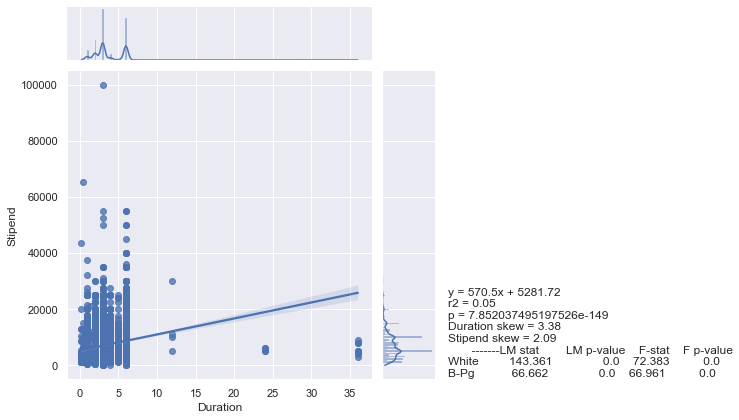

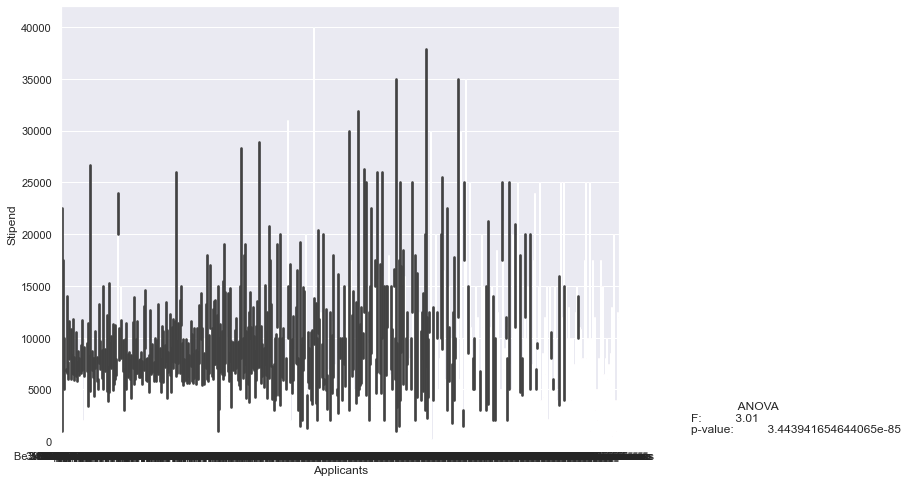

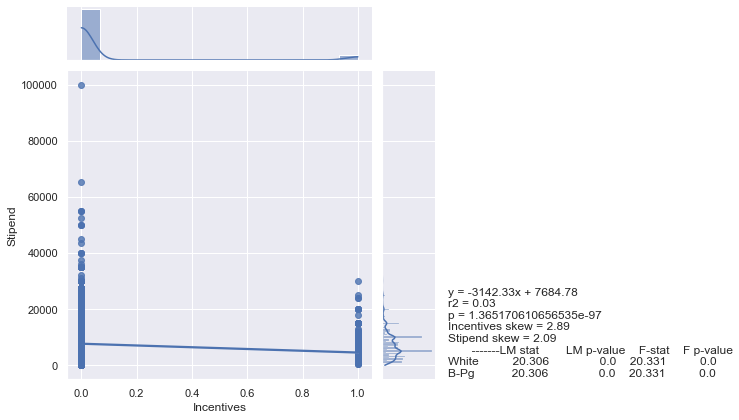

,Stat,+/-,Effect Size,p-value
Duration,r,Positive(+),0.214,7.852037e-149
Incentives,r,Negative(-),0.173,1.365171e-97
Location,F,,7.947,8.995133e-204
Applicants,F,,3.006,3.443942e-85
Perks,NaN,NaN,NaN,NaN
Number of Openings,NaN,NaN,NaN,NaN


In [414]:
# we call our bivariate stats function to get an overview of all the pairwise relationships in our dataset
func.bivarstats(df[['Location', 'Duration', 'Stipend', 'Applicants', 'Perks', 'Number of Openings', 'Incentives']], "Stipend")

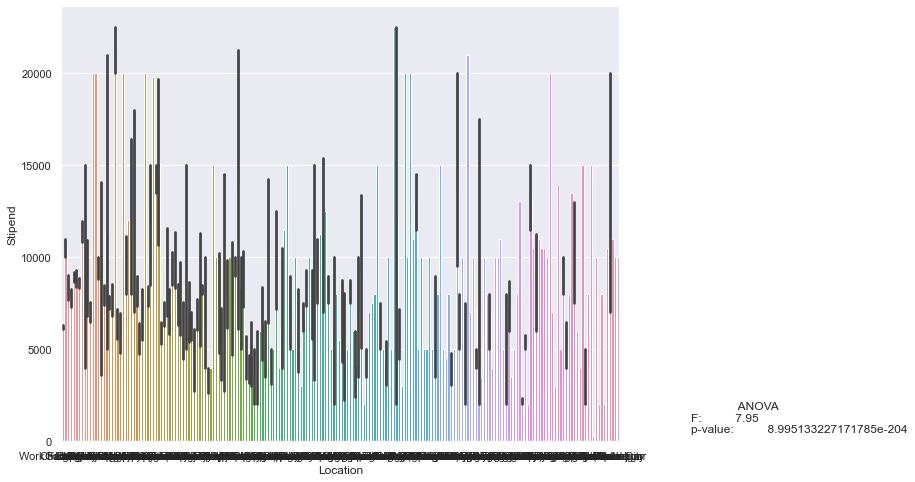

,Stat,+/-,Effect Size,p-value
Location,F,,7.947,8.995133e-204


In [415]:
# checking our Location variable stats with Bivariate stats function
func.bivarstats(df[['Location', 'Stipend']], "Stipend")

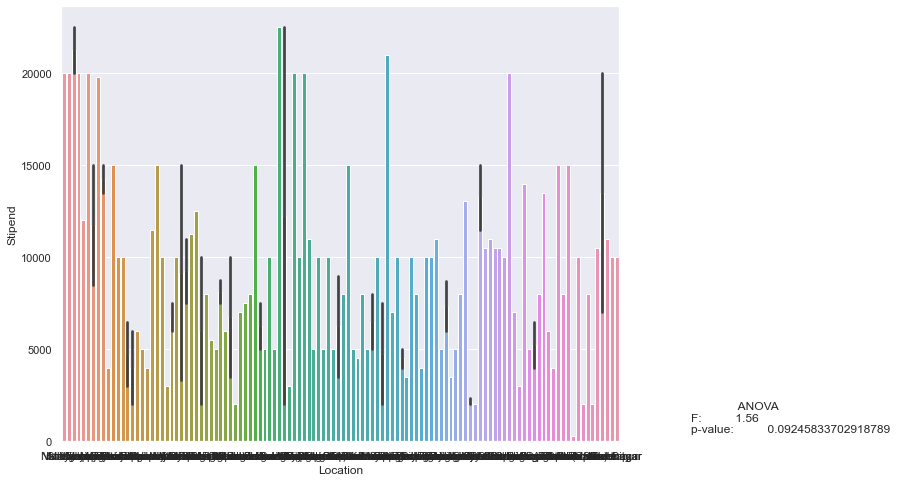

,Stat,+/-,Effect Size,p-value
Location,F,,1.557,0.092458


In [416]:
# we check for significance of locations with 2 or less occurrences in predicting stipend
loc_vc = pd.DataFrame(df.Location.value_counts())
loc_vc = loc_vc[loc_vc <= 2].dropna(axis=0)
loc_ot_df = df[df.Location.isin(loc_vc.index)]
func.bivarstats(loc_ot_df[['Location', 'Stipend']], "Stipend")

In [417]:
# Changed all locations(2 or less occurrences) to "Other" category as they will be insignificant for our prediction model
loc_vc = pd.DataFrame(df.Location.value_counts())
loc_vc = loc_vc[loc_vc <= 2].dropna(axis=0)
loc_rem_list = list(loc_vc.index)
otherlist = []
for i in range(1,len(loc_rem_list)+1):
    otherlist.append("Other")
reploc_dict = dict(zip(loc_rem_list, otherlist))
df.Location.replace(reploc_dict, inplace=True)

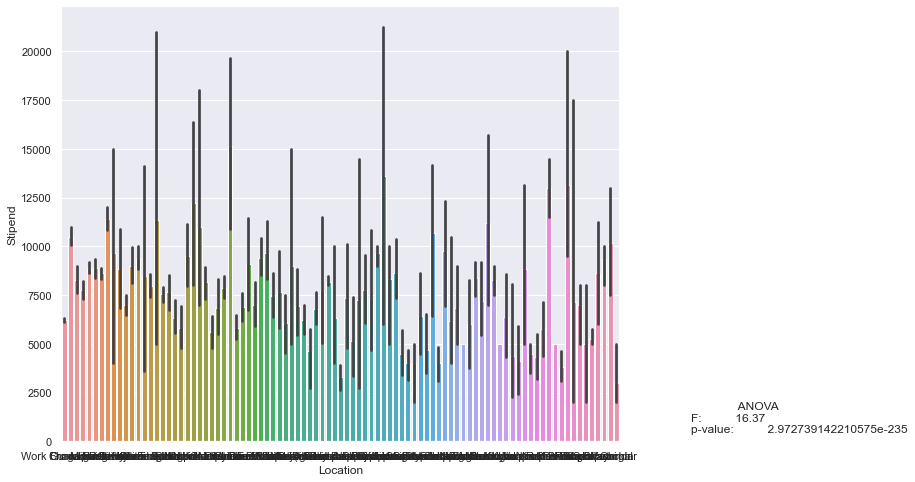

,Stat,+/-,Effect Size,p-value
Location,F,,16.365,2.972739e-235


In [418]:
# checking our Location variable stats with Bivariate stats function
func.bivarstats(df[['Location', 'Stipend']], "Stipend")

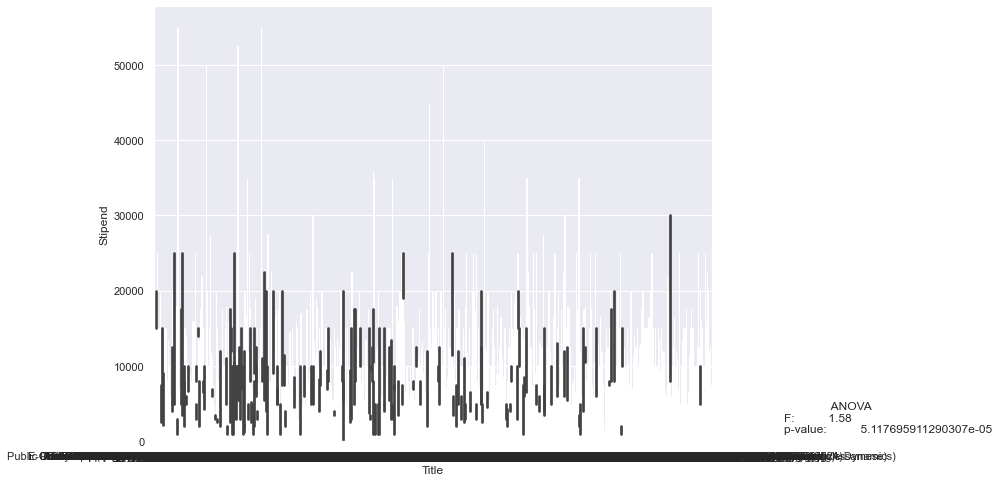

,Stat,+/-,Effect Size,p-value
Title,F,,1.579,0.000051


In [419]:
# we check for significance of titles with 2 or less occurrences in predicting stipend
tt_vc = pd.DataFrame(df.Title.value_counts())
tt_vc = tt_vc[tt_vc <= 2].dropna(axis=0)
tt_ot_df = df[df.Title.isin(tt_vc.index)]
func.bivarstats(tt_ot_df[['Title', 'Stipend']], "Stipend")

In [420]:
# we replace some same terms with different names to improve consistency
df.Title = df.Title.apply(lambda x: "Sales" if "sales" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Accounting" if "account" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Java Development" if "js" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Android Developer" if "android" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Electrical Engineering" if "elect" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Flutter Development" if "flutter" in x.lower() else x)
df.Title = df.Title.apply(lambda x: "Photography" if "phot" in x.lower() else x)

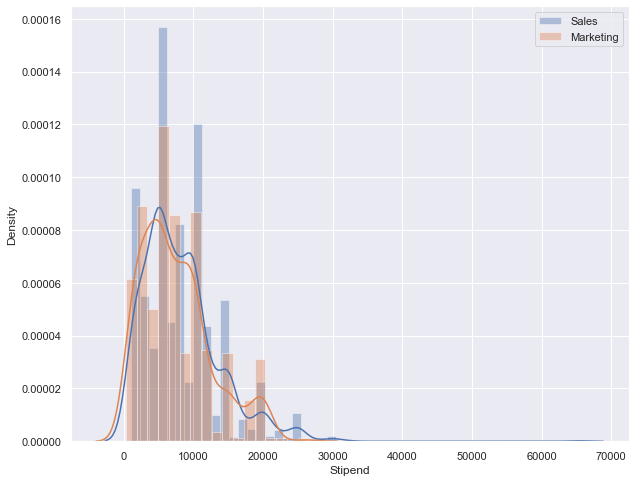

Ttest_indResult(statistic=2.540346139756761, pvalue=0.011136860178341427)

In [421]:
# we test a hypothesis for "Marketing" and "Sales" in Title column are similar and that they dont have significant effect on target variable
from scipy.stats import ttest_ind
sns.distplot(df[df.Title == "Sales"]["Stipend"], label="Sales")
sns.distplot(df[df.Title == "Marketing"]["Stipend"], label="Marketing")
plt.legend()
plt.show()
ttest_ind(df[df.Title == "Sales"]["Stipend"], df[df.Title == "Marketing"]["Stipend"])

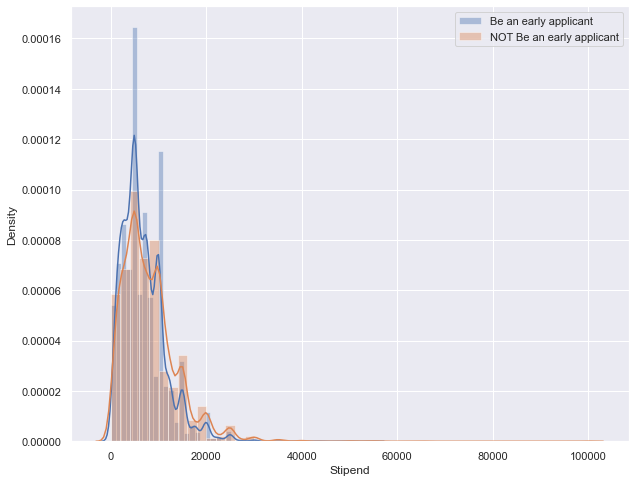

Ttest_indResult(statistic=-15.531627638313225, pvalue=5.78153221676758e-54)

In [422]:
# we test a hypothesis for if "Be an early applicant" is significant in our Applicants column:
sns.distplot(df[df.Applicants == "Be an early applicant"]["Stipend"], label="Be an early applicant")
sns.distplot(df[df.Applicants != "Be an early applicant"]["Stipend"], label="NOT Be an early applicant")
plt.legend()
plt.show()
ttest_ind(df[df.Applicants == "Be an early applicant"]["Stipend"], df[df.Applicants != "Be an early applicant"]["Stipend"])

In [423]:
# parsed the numeric values
df.Applicants = df.Applicants.apply(lambda x: x.split(" ")[0])
df.Applicants.replace("Be", "Early Application Phase", inplace=True)

In [424]:
# created separate column for conversion
df["Applicants1"] = df.Applicants.apply(lambda x: x if x.isnumeric() == True else 0)
df.Applicants1 = df.Applicants1.astype("int")

In [425]:
# created a function to create bins of 250
def bin_func(x):
    if ((x > 0) & (x <= 250)):
        return "0-250"
    elif ((x > 250) & (x <= 500)):
        return "250-500"
    elif ((x > 500) & (x <= 750)):
        return "500-750"
    elif ((x > 750) & (x <= 1000)):
        return "750-1000"
    else:
        return "0"

In [426]:
# passed the function
df["Applicants2"] = df.Applicants1.apply(bin_func)

In [427]:
# restored bins back to original column
df["Applicants"] = df.apply(lambda x: x["Applicants"] if x["Applicants2"] == "0" else x["Applicants2"], axis=1)
df.drop(columns=["Applicants1", "Applicants2"], inplace=True)

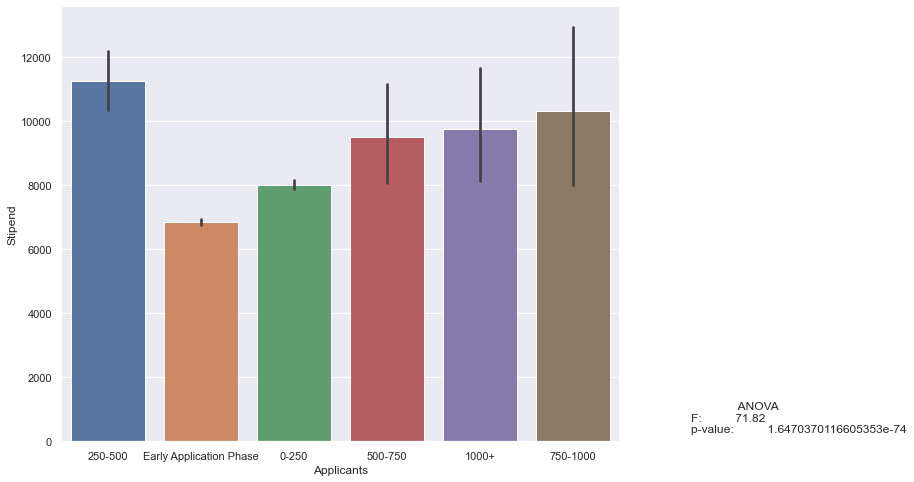

,Stat,+/-,Effect Size,p-value
Applicants,F,,71.824,1.647037e-74


In [428]:
# we check for significance with F-test
func.bivarstats(df[['Applicants', 'Stipend']], "Stipend")

In [429]:
# we run a tukey hsd test
import statsmodels.stats.multicomp as multi 
mc = multi.MultiComparison(df['Stipend'], df['Applicants'])
Results = mc.tukeyhsd()
print(Results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
 group1           group2          meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------------------------
   0-250                   1000+  1745.6515 0.3853  -832.7949   4324.098  False
   0-250                 250-500  3238.8373  0.001  2340.6992  4136.9754   True
   0-250                 500-750  1470.2579  0.315  -575.5815  3516.0972  False
   0-250                750-1000  2284.5204 0.2654  -754.4441   5323.485  False
   0-250 Early Application Phase -1163.9479  0.001 -1413.9621  -913.9337   True
   1000+                 250-500  1493.1858 0.6042 -1223.4846  4209.8561  False
   1000+                 500-750  -275.3937    0.9 -3555.5011  3004.7137  False
   1000+                750-1000   538.8689    0.9 -3437.1783  4514.9161  False
   1000+ Early Application Phase -2909.5994 0.0163 -5485.6726  -333.5263   True
 250-500                 500-750 -1768.5

In [430]:
# filled null values in skills required
df["Skills Required"].fillna("Not Specific , ", axis=0, inplace=True)
# created list with all specific skills for each row
df["Skills Required"] = df["Skills Required"].apply(lambda x: x.split(" , ")[:-1])

In [431]:
# we explore the counts of all specific skills from lists of each row

from collections import Counter
import operator

s_list = []
for i in df["Skills Required"]:
    s_list += i

skill_cnt = dict(Counter(s_list))
skill_cnt_dict = dict(sorted(skill_cnt.items(), key=operator.itemgetter(1),reverse=True))
skill_count_df = pd.DataFrame(skill_cnt_dict.items(), columns=['Skill', 'Count'])
skill_count_df

,Skill,Count
0,English Proficiency (Written),3910
1,English Proficiency (Spoken),3843
2,Not Specific,3210
3,Social Media Marketing,2137
4,Digital Marketing,2082
...,...,...
378,PLC SCADA,1
379,OrCAD,1
380,Urdu Proficiency(Written),1
381,InterPlanetary File System,1


In [432]:
# filled null values in perks
df["Perks"].fillna("NA , ", axis=0, inplace=True)
# created list with all specific perks for each row
df["Perks"] = df["Perks"].apply(lambda x: x.split(" , ")[:-1])

In [433]:
# we explore the counts of all specific perks from lists of each row

p_list = []
for i in df["Perks"]:
    p_list += i

perk_cnt = dict(Counter(p_list))
perk_cnt_dict = dict(sorted(perk_cnt.items(), key=operator.itemgetter(1),reverse=True))
perk_count_df = pd.DataFrame(perk_cnt_dict.items(), columns=['Perk', 'Count'])
perk_count_df

,Perk,Count
0,Certificate,12377
1,Letter of recommendation,9891
2,Flexible work hours,7383
3,5 days a week,4441
4,Informal dress code,3184
5,Job offer,3102
6,Free snacks & beverages,1404
7,NA,900


In [434]:
# we fill nulls in "Number of Openings" column with its mean
df["Number of Openings"].fillna(df["Number of Openings"].mean(), inplace=True)

##### Exploratory Data Analysis (EDA)

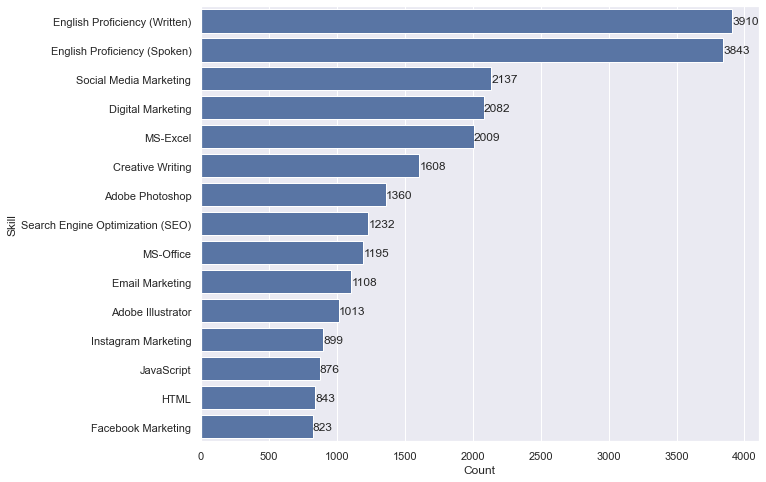

In [435]:
# we create a horizontal bar graph to visually explore the top 15 most popular skills required for internships
ax = sns.barplot(x="Count", y="Skill", data=skill_count_df[skill_count_df["Skill"] != "Not Specific"][0:15],label="Total", color="b");
abs_values = skill_count_df[skill_count_df["Skill"] != "Not Specific"][0:15]["Count"].value_counts(ascending=False).index
ax.bar_label(container=ax.containers[0], labels=abs_values);

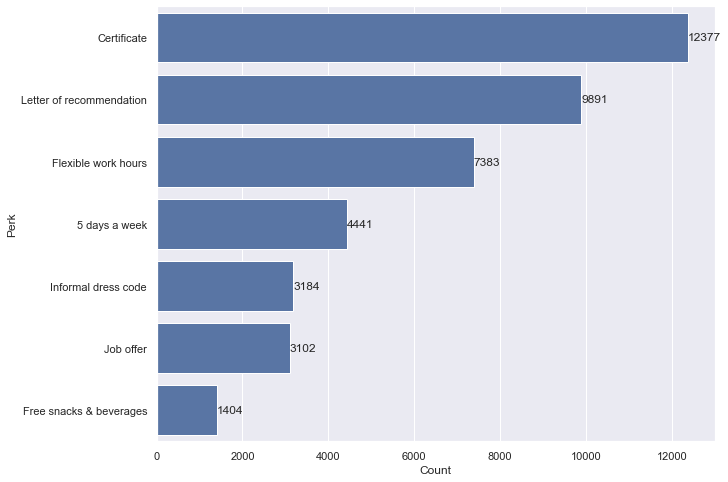

In [436]:
# we create a horizontal bar graph to visually explore the most popular perks offered in internships
ax = sns.barplot(x="Count", y="Perk", data=perk_count_df[perk_count_df["Perk"] != "NA"],label="Total", color="b")
abs_values = perk_count_df[perk_count_df["Perk"] != "NA"]["Count"].value_counts(ascending=False).index
ax.bar_label(container=ax.containers[0], labels=abs_values);

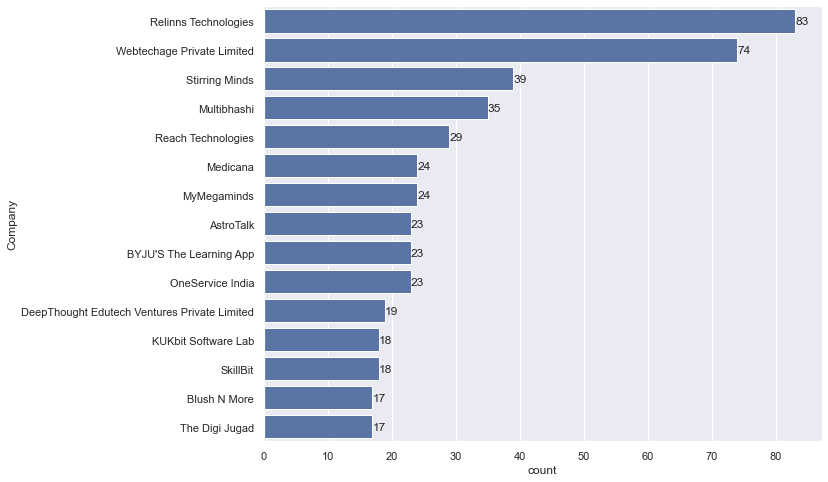

In [437]:
# we create a horizontal bar graph to visually explore the top 15 hiring companies
ax = sns.countplot(y=df['Company'], order=df['Company'].value_counts(ascending=False).iloc[:15].index, color="b")
abs_values = df['Company'].value_counts(ascending=False).iloc[:15].values
ax.bar_label(container=ax.containers[0], labels=abs_values);

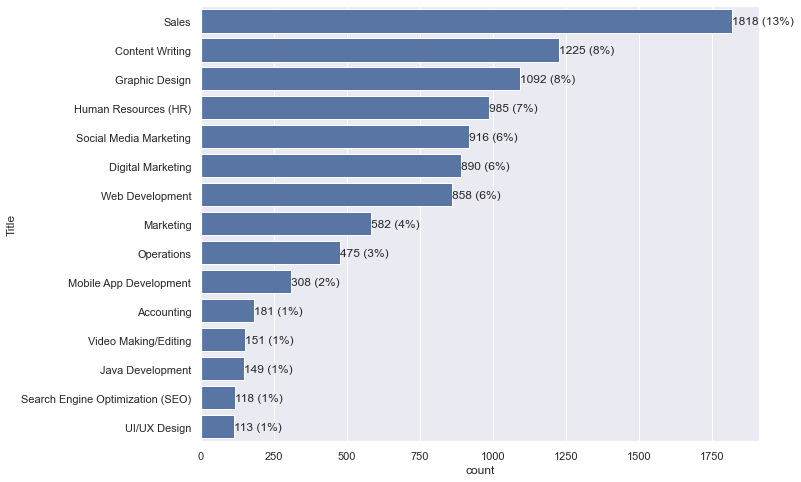

In [438]:
# we create a horizontal bar graph to visually explore the top 15 titles required for internships
ax = sns.countplot(y="Title", data=df, order=df.Title.value_counts(ascending=False).iloc[:15].index, color="b")
abs_values = df['Title'].value_counts(ascending=False).iloc[:15]
rel_values = df['Title'].value_counts(ascending=False, normalize=True).iloc[:15].values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

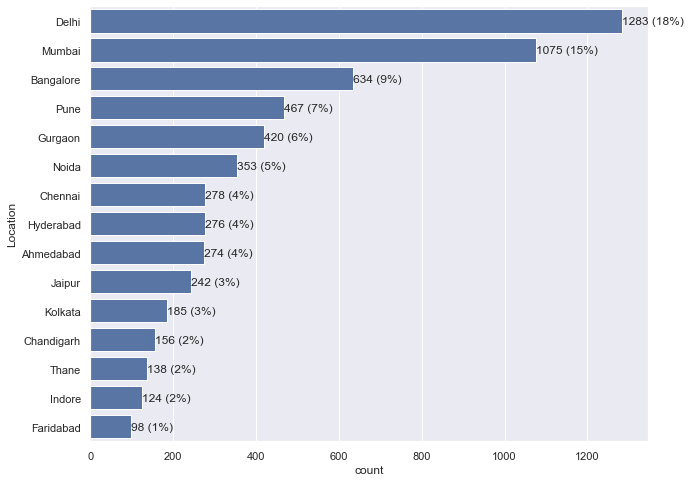

In [439]:
# we create a horizontal bar graph to visually explore the top 15 locations offering most in-office internships
locmaskdf = df[(df["Location"] != "Work From Home") & (df["Location"] != "Other")]
ax = sns.countplot(y="Location", data=locmaskdf, order=locmaskdf.Location.value_counts(ascending=False).iloc[:15].index, color="b")
abs_values = locmaskdf['Location'].value_counts(ascending=False).iloc[:15]
rel_values = locmaskdf['Location'].value_counts(ascending=False, normalize=True).iloc[:15].values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

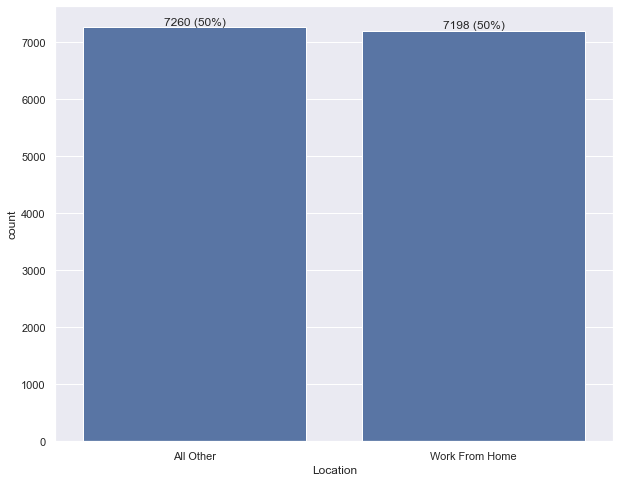

In [440]:
# we create a simple bar graph to visually explore the ratio of in-office internships to Work from Home internships
dfwfh = df.copy()
notwfhmask = dfwfh[dfwfh["Location"] != "Work From Home"]["Location"].index
dfwfh.loc[notwfhmask, "Location"] = "All Other"
ax = sns.countplot(x="Location", data=dfwfh, order=dfwfh.Location.value_counts(ascending=False).index, color="b")
abs_values = dfwfh['Location'].value_counts(ascending=False)
rel_values = dfwfh['Location'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

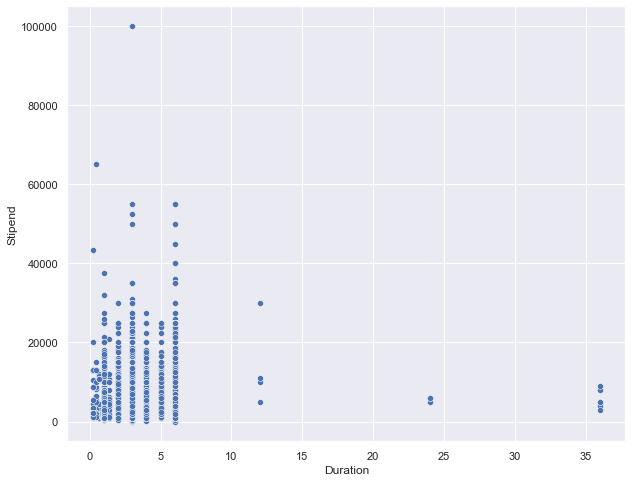

In [441]:
# we create a scatter plot to explore the relationship between Duration and our Target Variable Stipend
sns.scatterplot("Duration", "Stipend", data=df);

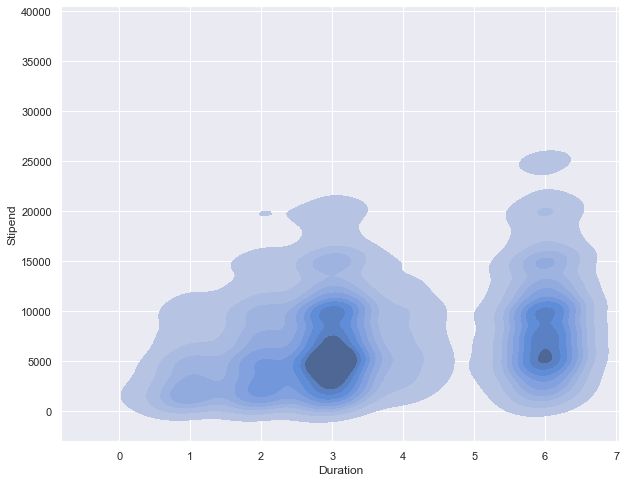

In [442]:
# we create a kde plot after filtering outliers for better interpretation
sns.kdeplot(data=df[(df["Stipend"] < 40000) & (df["Duration"] < 10)],x="Duration", y="Stipend", fill=True);

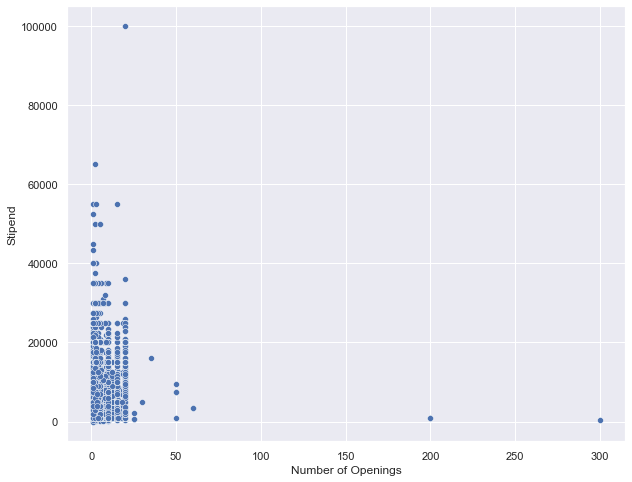

In [443]:
# we create a scatter plot to explore the relationship between Number of Openings and our Target Variable Stipend
sns.scatterplot("Number of Openings", "Stipend", data=df);

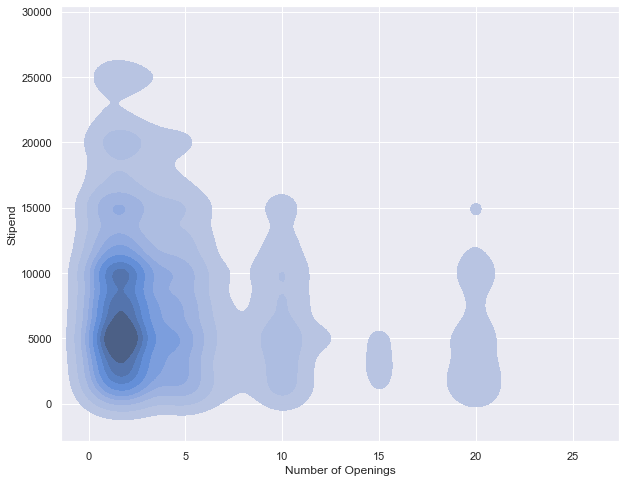

In [444]:
# we create a kde plot after filtering outliers for better interpretation
sns.kdeplot(data=df[(df["Stipend"] < 30000) & (df["Number of Openings"] < 27)],x="Number of Openings", y="Stipend", fill=True);

##### Target Variable Transformation

In [445]:
# we remove some outliers as seen from above scatter plot
df.drop(df[(df.Stipend > 60000) | (df.Stipend < 1000)].index, axis=0, inplace=True)

Skewness =  1.68


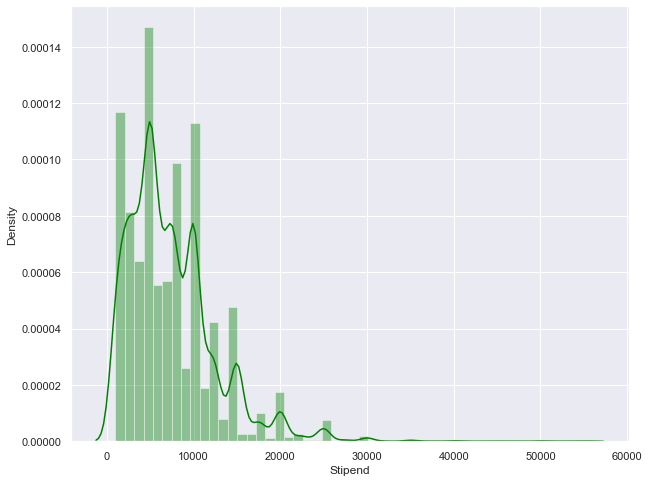

In [446]:
# we check the distribution and skewness
sns.distplot(df["Stipend"], color= "green");
print("Skewness = ", round(df.Stipend.skew(), 2))

Skewness Before Transformation =  1.68 
Skewness After Transformation =  -0.55


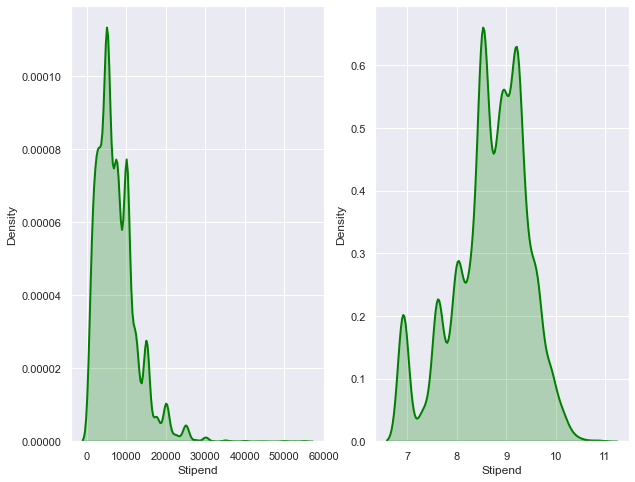

In [447]:
# we perform log transformation and check for skewness
fig, ax = plt.subplots(1, 2)
sns.distplot(df["Stipend"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])
  
sns.distplot(np.log(df["Stipend"]), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])
  
print("Skewness Before Transformation = ", round(df.Stipend.skew(), 2), "\nSkewness After Transformation = ", round(np.log(df["Stipend"]).skew(), 2))
plt.show()

Skewness Before Transformation =  1.68 
Skewness After Transformation =  -0.02


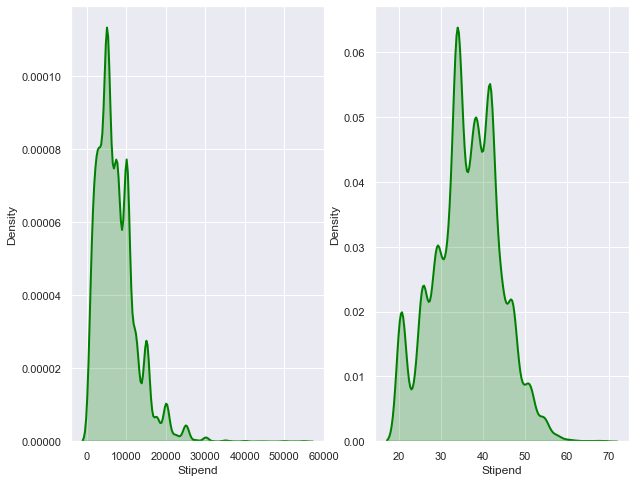

In [448]:
# we perform boxcox transformation and check for skewness
from scipy import stats
from scipy.special import boxcox, inv_boxcox
fit, lmda = stats.boxcox(df["Stipend"])

fig, ax = plt.subplots(1, 2)
sns.distplot(df["Stipend"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])
  
sns.distplot(boxcox(df["Stipend"], lmda), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])
  
print("Skewness Before Transformation = ", round(df.Stipend.skew(), 2), "\nSkewness After Transformation = ", round(boxcox(df["Stipend"], lmda).skew(), 2))
plt.show()

Skewness Before Transformation =  1.68 
Skewness After Transformation =  0.45


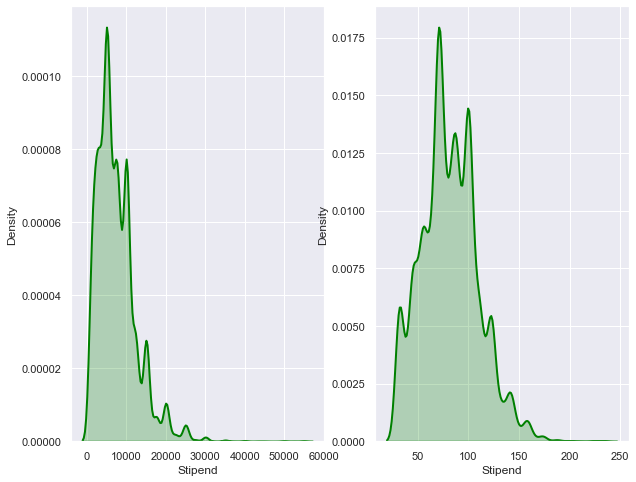

In [449]:
# we perform square root transformation and check for skewness
fig, ax = plt.subplots(1, 2)
sns.distplot(df["Stipend"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])
  
sns.distplot(np.sqrt(df["Stipend"]), hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])
  
print("Skewness Before Transformation = ", round(df.Stipend.skew(), 2), "\nSkewness After Transformation = ", round(np.sqrt(df["Stipend"]).skew(), 2))
plt.show()

In [450]:
# we store all the transformations for comparisons later
df["Stipend_log"] = np.log(df["Stipend"])
df["Stipend_sqrt"] = np.sqrt(df["Stipend"])
df["Stipend_boxcox"] = boxcox(df["Stipend"], lmda)

##### Creation of Dummy Variables

In [451]:
# we create dummies dataframe for each specific skill in "Skills Required" and store it
from sklearn.preprocessing import MultiLabelBinarizer

sklist = list(df["Skills Required"])
dfsk = pd.DataFrame({'groups': sklist}, columns=['groups'])
s = dfsk['groups']
mlb = MultiLabelBinarizer()
y = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)
y.sample(3)

,.NET,3ds Max,AJAX,ANSYS,ARM Microcontroller,ASP.NET,Ableton Live,Accounting,Acting Audition,Acting technique,...,Wireframing,WordPress,XML,Xamarin,Xcode,Yii,ZBrush,iOS,jQuery,web3.js
2478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [452]:
# we create dummies dataframe for each specific perk in "Perks" and store it to concat later

prklist = list(df["Perks"])
dfprk = pd.DataFrame({'groups': prklist}, columns=['groups'])
p = dfprk['groups']
mlbp = MultiLabelBinarizer()
z = pd.DataFrame(mlbp.fit_transform(p),columns=mlbp.classes_, index=df.index)
z.sample(3)

,5 days a week,Certificate,Flexible work hours,Free snacks & beverages,Informal dress code,Job offer,Letter of recommendation,NA
10514,0,1,1,0,0,0,1,0
8778,0,1,0,0,0,0,0,0
14562,0,1,0,0,0,0,0,0


In [453]:
# we create dummies for Title, Location and Applicants
dum = pd.get_dummies(df[["Title", "Location", "Applicants"]])

In [454]:
# we concat all our dummies
df1 = pd.concat([df, y, z, dum], axis=1)

In [455]:
# we drop irrelevant columns as we got dummies
df1.drop(["Title", "Location", "Company", "Skills Required", "Perks", "Applicants"], axis=1, inplace=True)

##### Pre-Modelling Tests

In [456]:
# we run ANOVA test on all features to get summary to test for significance with our target variable
cols = list(df1.columns)
anova_df1 = pd.DataFrame(columns=["Stat", "+/-", "Effect Size", "p-value"])

for col in df1[cols]:
        if not col == "Stipend":
            if not col == "Stipend_log":
                if not col == "Stipend_sqrt":
                    if not col == "Stipend_boxcox":
                        F, p = func.anova(df1[[col, "Stipend_boxcox"]], col, "Stipend_boxcox")
                        anova_df1.loc[col] = ["F", "", round(F, 3), round(p, 6)]
           
anova_df1.sort_values(["Effect Size"], ascending=False)

,Stat,+/-,Effect Size,p-value
Location_Work From Home,F,,1406.721,0.000000
Flexible work hours,F,,718.610,0.000000
Incentives,F,,712.050,0.000000
Job offer,F,,431.618,0.000000
Location_Bangalore,F,,377.850,0.000000
...,...,...,...,...
OpenCV,F,,0.000,0.987366
Title_Subject Matter Expert (Project Management),F,,0.000,0.982729
Rhino,F,,0.000,0.990098
Odia Proficiency(Written),F,,0.000,0.989617


In [457]:
# we check all correlation coefficients and significance with our target variable
from scipy import stats
corr_df = pd.DataFrame(columns=["r", "p"])

for col in df1:
    if col != "Stipend":
        if col != "Stipend_log":
            if col != "Stipend_sqrt":
                if col != "Stipend_boxcox":
                    r, p = stats.pearsonr(df1.Stipend, df1[col])
                    corr_df.loc[col] = [round(r, 3), round(p, 6)]
        
corr_df

,r,p
Duration,0.218,0.000000
Number of Openings,-0.023,0.005697
Incentives,-0.176,0.000000
.NET,0.033,0.000059
3ds Max,0.000,0.994469
...,...,...
Applicants_1000+,0.022,0.008957
Applicants_250-500,0.101,0.000000
Applicants_500-750,0.024,0.003567
Applicants_750-1000,0.026,0.002100


In [458]:
# we create a copy of our dataframe for further use
df2 = df1.copy()

##### Model Building

In [459]:
# we import the libraries necessary for creating our ML model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

In [460]:
# we prepare our input and target sets
X = df2.drop(columns=["Stipend", "Stipend_log", "Stipend_sqrt", "Stipend_boxcox"])
y, yl, ys, yb = df2["Stipend"], df2["Stipend_log"], df2["Stipend_sqrt"], df2["Stipend_boxcox"]

In [461]:
# we scale our data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [462]:
# we divide all our transformed datasets into train test splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=45)
X1_train, X1_test, yl_train, yl_test = train_test_split(X_scaled, yl, test_size=0.2, random_state=45)
X2_train, X2_test, ys_train, ys_test = train_test_split(X_scaled, ys, test_size=0.2, random_state=45)
X3_train, X3_test, yb_train, yb_test = train_test_split(X_scaled, yb, test_size=0.2, random_state=45)

In [463]:
# we fit the non transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
print("Train Set R squared value =", lgbm_model.score(X_train, y_train)), print("Test Set R squared value =", lgbm_model.score(X_test, y_test))
print("Train Set MAE =",mean_absolute_error(y_train, lgbm_model.predict(X_train)))
print("Test Set MAE =",mean_absolute_error(y_test, lgbm_model.predict(X_test)))

Train Set R squared value = 0.45015071408279395
Test Set R squared value = 0.298676940460025
Train Set MAE = 2729.5772899948875
Test Set MAE = 3092.31511957024


In [464]:
# we fit the log transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X1_train, yl_train)
print("Train Set R squared value =", lgbm_model.score(X1_train, yl_train)), print("Test Set R squared value =", lgbm_model.score(X1_test, yl_test))
print("Train Set MAE =",mean_absolute_error(np.exp(yl_train), np.exp(lgbm_model.predict(X1_train))))
print("Test Set MAE =",mean_absolute_error(np.exp(yl_test), np.exp(lgbm_model.predict(X1_test))))

Train Set R squared value = 0.4990846620382675
Test Set R squared value = 0.38913603294159105
Train Set MAE = 2705.717242259425
Test Set MAE = 2995.7652590820894


In [465]:
# we fit the square root transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X2_train, ys_train)
print("Train Set R squared value =",lgbm_model.score(X2_train, ys_train)), print("Test Set R squared value =",lgbm_model.score(X2_test, ys_test))
print("Train Set MAE =",mean_absolute_error(np.square(ys_train), np.square(lgbm_model.predict(X2_train))))
print("Test Set MAE =",mean_absolute_error(np.square(ys_test), np.square(lgbm_model.predict(X2_test))))

Train Set R squared value = 0.47898181888397406
Test Set R squared value = 0.35393380307777766
Train Set MAE = 2677.0622560256634
Test Set MAE = 3009.4490733168277


In [466]:
# we fit the boxcox transformed data on vanilla LGBM model and check scores as benchmark to compare model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X3_train, yb_train)
print("Train Set R squared value =",lgbm_model.score(X3_train, yb_train)), print("Test Set R squared value =",lgbm_model.score(X3_test, yb_test))
print("Train Set MAE =",mean_absolute_error(inv_boxcox(yb_train, lmda), inv_boxcox(lgbm_model.predict(X3_train), lmda)))
print("Test Set MAE =",mean_absolute_error(inv_boxcox(yb_test, lmda), inv_boxcox(lgbm_model.predict(X3_test), lmda)))

Train Set R squared value = 0.4905239891263027
Test Set R squared value = 0.36832996446576916
Train Set MAE = 2678.3293523951365
Test Set MAE = 3009.8975026588714


In [467]:
# we run a For-loop to find the ideal value of lambda for our L2 Regularization
testlist = []
count = []
reg_lam = []
for i in range(0, 10000, 25):
    lgbm_model = LGBMRegressor(reg_lambda=i)
    lgbm_model.fit(X3_train, yb_train)
    train_mae = mean_absolute_error(inv_boxcox(yb_train, lmda), inv_boxcox(lgbm_model.predict(X3_train), lmda))
    test_mae = mean_absolute_error(inv_boxcox(yb_test, lmda), inv_boxcox(lgbm_model.predict(X3_test), lmda))
    testlist.append(np.round(test_mae-train_mae, 2))
    count.append(len(testlist))
    reg_lam.append(i)
lam_dict = dict(zip(count, reg_lam))

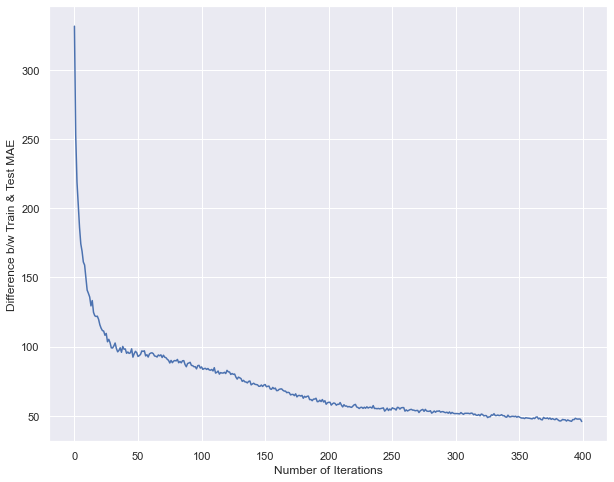

In [468]:
# we plot the result of our For-Loop
plt.plot(testlist)
plt.xlabel("Number of Iterations")
plt.ylabel("Difference b/w Train & Test MAE");

In [469]:
# we find the ideal lambda value
reg_lam[225]

5625

In [470]:
# we define a function to evaluate our model on MAE score
def evaluate_mae(model, X, y, type):
    if type == "boxcox":
        scores = mean_absolute_error(inv_boxcox(y, lmda), inv_boxcox(model.predict(X), lmda))
        return scores

In [471]:
# we do randomized search cv to find best hyper-parameters

parameters= {
    "num_leaves": [15, 25, 35, 45, 55, 65, 75], # provided smaller num_leaves to adjust for overfitting 
    "max_depth": [-1, 0, 2, 3, 4, 5, 8, 10, 15, 20], # provided max_depth to adjust for overfitting
    "learning_rate": [0.005, 0.01, 0.05, 0.75, 0.1, 0.15, 0.2], # provided wide range for learning_rate to experiment combinations with wide range of num_iterations
    "max_bin": [35, 45, 55, 65, 75, 90], # provided smaller max_bin to deal with overfitting and also for faster speed
    "num_iterations": [50, 100, 150, 200, 350, 500, 750, 1000, 1500] # vice versa as learning rate
    #"path_smooth": [5, 10, 15, 20, 25, 30], # we dont use path smooth here as we are already providing L2 Regularization
}

rclfbox = RandomizedSearchCV(estimator=LGBMRegressor(reg_lambda=5625), param_distributions= parameters, scoring="neg_mean_absolute_error", verbose=False, n_iter=100, error_score="raise", cv=6)
rclfbox.fit(X3_train, yb_train)
scores = evaluate_mae(rclfbox.best_estimator_, X3_train, yb_train, "boxcox")
print(">>","Train Set MAE Score:", scores)
scores = evaluate_mae(rclfbox.best_estimator_, X3_test, yb_test, "boxcox")
print(">>","Test Set MAE Score:", scores)

>> Train Set MAE Score: 2667.1285996715033
>> Test Set MAE Score: 2984.2027614419844


In [472]:
# we check the best hyper-parameters
rclfbox.best_params_

{'num_leaves': 45,
 'num_iterations': 750,
 'max_depth': 10,
 'max_bin': 65,
 'learning_rate': 0.75}

In [473]:
# we check the importance of all our features
zip_data = list(zip(X.columns, lgbm_model.feature_importances_))
feature_imp_df = pd.DataFrame(zip_data, columns =['Feature', 'Importance'])
feature_imp_df.sort_values("Importance", ascending=False)

,Feature,Importance
0,Duration,242
2,Incentives,106
2498,Applicants_Early Application Phase,101
1,Number of Openings,85
2491,Location_Work From Home,76
...,...,...
875,Title_Customer Care (Russian),0
876,Title_Customer Delight,0
877,Title_Customer Delight Telecalling (Real Estate),0
878,Title_Customer Experience,0


##### Saving of the Model

In [474]:
# we save the model, scaler and feature names dictionary for our flask api
import pickle
pickle.dump(rclfbox.best_estimator_, open('flask-app\internshala_lgbm_model.pkl', 'wb'))
pickle.dump(scaler, open('flask-app\scaler.pkl','wb'))
index_dict = dict(zip(X.columns,range(X.shape[1])))
pickle.dump(index_dict, open('flask-app\index_dict.pkl', 'wb'))